In [24]:
# 기본적인 import들
# 이후 그래프 그리는 코드에는 중복으로 적지 않음.
# 다른 곳으로 그래프 그리는 코드를 복사-붙이기 할 때는 
# 이 import 코드와 함께 복사-붙이기 해야함
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits import mplot3d
import matplotlib.font_manager as mfm

# 그래프에 한글 폰트 사용을 위한 설정
# https://financedata.github.io/posts/matplotlib-hangul-for-ubuntu-linux.html
path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
fontprop = mfm.FontProperties(fname=path, size=18)

# numpy 출력 형식 지정
np.set_printoptions(precision=4, linewidth=150)

# matplotlib 스타일 지정
mpl.style.use('bmh')
mpl.style.use('seaborn-whitegrid')
style = plt.style.library['bmh']
# 스타일 컬러를 쉽게 쓸 수 있도록 리스트 저장
style_colors = [ c['color'] for c in style['axes.prop_cycle'] ]

# 지수함수의 극한


지면 관계로 책에 다 싣지 못한 지수함수의 특별한 형태에 대한 극한을 설명합니다.


### 1. $\lim_{x \to 0} \dfrac{e^x - 1}{x} = 1$

주어진 식은 $x=0$일 때 $\frac{0}{0}$이 되므로 함수값이 정의되지 않습니다. 위 함수의 그래프를 그려서 $x=0$ 근처에서 어떤 형상인지 확인해보도록 합시다.  위 함수는 분자와 분모의 비를 함숫값으로 가지고 있습니다. 따라서 $x=0$ 근처에서 분자 $x$와 분모 $e^x - 1$이 함수로서 어떤 형태를 띄는지 비교해보는 것은 극한의 직관을 얻기 위한 좋은 방법입니다.

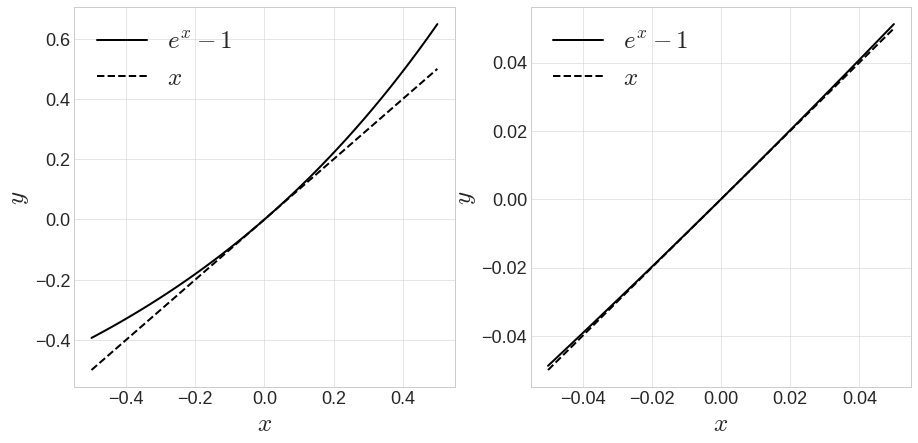

In [34]:
f = lambda x : np.exp(x) - 1
g = lambda x : x

fig = plt.figure(figsize=(15,7))

ax1 = fig.add_subplot(1, 2, 1)
ax1.xaxis.set_tick_params(labelsize=18)
ax1.yaxis.set_tick_params(labelsize=18)
x = np.linspace(-0.5, 0.5, 100)
ax1.plot(x, f(x), 'k', label=r"$e^x - 1$")
ax1.plot(x, g(x), 'k--', label=r"$x$")
ax1.legend(fontsize=25)
ax1.set_xlabel(r'$x$', fontsize=25)
ax1.set_ylabel(r'$y$', fontsize=25)

ax2 = fig.add_subplot(1, 2, 2)
ax2.xaxis.set_tick_params(labelsize=18)
ax2.yaxis.set_tick_params(labelsize=18)
x = np.linspace(-0.05, 0.05, 100)
ax2.plot(x, f(x), 'k', label=r"$e^x - 1$")
ax2.plot(x, g(x), 'k--', label=r"$x$")
ax2.legend(fontsize=25)
ax2.set_xlabel(r'$x$', fontsize=25)
ax2.set_ylabel(r'$y$', fontsize=25)

plt.show()

그래프를 확인해보면 $e^x-1$과 $x$는 0 근방에서 거의 똑같은 함수입니다. 따라서 $x=0$ 근방에서 두 함수의 비는 1이 될 것이라 예상할 수 있습니다. 직접 $\dfrac{e^x-1}{x}$를 그려 보면 다음과 같습니다.

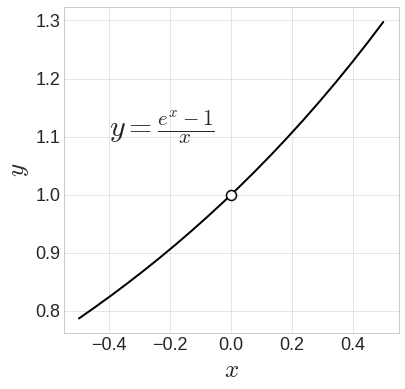

In [11]:
f = lambda x : (np.exp(x) - 1) / x
x = np.linspace(-0.5, 0.5, 20)

plt.figure(figsize=(6,6))
plt.plot(x, f(x), 'k')
plt.plot(0, 1, 'o',   markersize=10, markerfacecolor='w',
         markeredgewidth=1.5, markeredgecolor='k')
plt.text(-0.4, 1.1, r"$y=\frac{e^x - 1}{x}$", fontsize=30)
plt.xlabel(r'$x$', fontsize=25)
plt.ylabel(r'$y$', fontsize=25)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)a

plt.show()

주어진 함수 $f(x)$는 $x=0$에서 정의되지 않지만 예상처럼 그래프를 통해 $x \to 0$일 때 $f(x) \to 1$인 것을 알 수 있습니다. 이 극한값을 구하기 위해서는 약간의 대수적 조작이 필요합니다. 

$$\lim_{x \to 0} \frac{e^x - 1}{x} $$

위 식에서 분자 $e^x - 1$를 $t$로 치환합니다. $t=e^x -1$으로 두면 $e^x = 1+t$입니다. 여기서 $x$를 로그로 표현하면 $x = \ln (1+t)$입니다. 한편 $x \to 0$일 때 $t$ 역시 0으로 다가가므로 주어진 함수를 다음처럼 바꿔 쓸 수 있습니다.

$$
\lim_{t \to 0} \frac{t}{\ln(1+t)}
$$

이제 다음과 같은 과정으로 극한을 구할 수 있습니다.

$$
\begin{aligned}
\lim_{t \to 0} \frac{t}{\ln(1+t)} 
&= \lim_{t \to 0} \frac{1}{ \dfrac{\ln(1+t)}{t} } \\[5pt]
&= \lim_{t \to 0} \frac{1}{ \dfrac{1}{t}\ln(1+t)  } \\[5pt]
&= \lim_{t \to 0} \frac{1}{\ln(1+t)^{\frac{1}{t}} } 
\end{aligned}
$$

마지막 등호는 로그의 성질 $\log_{a} M^k = k \log_{a} M$를 이용하였습니다. 분모에서 $(1+t)^{\frac{1}{t}} $ 부분은 ${t \to 0}$일 때 $e$입니다.($e$의 정의) 따라서

$$
\begin{aligned}
\lim_{t \to 0} \frac{t}{\ln(1+t)} 
&= \lim_{t \to 0} \frac{1}{ \dfrac{\ln(1+t)}{t} } \\[5pt]
&= \lim_{t \to 0} \frac{1}{\ln(1+t)^{\frac{1}{t}} } \\[5pt]
&=  \frac{1} {\ln e } = 1
\end{aligned}
$$

<hr/>

### 2. $\lim_{x \to 0} \dfrac{a^x - 1}{x} = \ln a$

2번도 비슷하게 1번 과정과 비슷하게 극한값을 구할 수 있습니다. 극한값을 그래프로 확인해보기 위해 먼저 그래프를 그려봅시다.

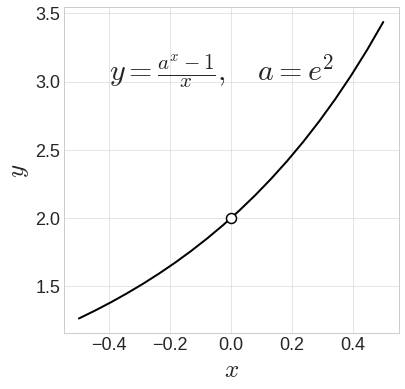

In [13]:
a = np.e**2
f = lambda x : (a**x - 1) / x
x = np.linspace(-0.5, 0.5, 20)

plt.figure(figsize=(6,6))
plt.plot(x, f(x), 'k')
plt.plot(0, np.log(a), 'o',    markersize=10, markerfacecolor='w',
         markeredgewidth=1.5, markeredgecolor='k')
plt.text(-0.4, 3, r"$y=\frac{a^x - 1}{x}, \quad a=e^2$", fontsize=30)
plt.xlabel(r'$x$', fontsize=25)
plt.ylabel(r'$y$', fontsize=25)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.show()

그래프를 그리기 위해 $a=e^2$로 설정했습니다. $x \to 0$일 때 함숫값이 2로 수렴합니다. $\ln e^2 = 2$이므로 주어진 함수의 극한값은 $\ln a$가 맞는 듯 보입니다. 구체적인 계산은 1번 과정과 완전히 동일합니다.


$$\lim_{x \to 0} \frac{a^x - 1}{x} $$

위 식에서 분자 $a^x - 1$를 $t$로 치환합니다. $t=a^x -1$으로 두면 $a^x = 1+t$입니다. 여기서 $x$를 로그로 표현하면 $x = \log_a (1+t)$입니다. 한편 $x \to 0$일 때 $t$ 역시 0으로 다가가므로 주어진 함수를 다음처럼 바꿔 쓸 수 있습니다.

$$
\lim_{t \to 0} \frac{t}{\log_a(1+t)}
$$

이제 다음과 같은 과정으로 극한을 구할 수 있습니다.

$$
\begin{aligned}
\lim_{t \to 0} \frac{t}{\log_a(1+t)} 
&= \lim_{t \to 0} \frac{1}{ \dfrac{\log_a(1+t)}{t} } \\[5pt]
&= \lim_{t \to 0} \frac{1}{\log_a(1+t)^{\frac{1}{t}} } 
\end{aligned}
$$

분모에서 $(1+t)^{\frac{1}{t}} $ 부분은 ${t \to 0}$일 때 $e$입니다.($e$의 정의) 따라서

$$
\begin{aligned}
\lim_{t \to 0} \frac{t}{\log_a(1+t)} 
&= \lim_{t \to 0} \frac{1}{ \dfrac{\log_a(1+t)}{t} } \\[5pt]
&= \lim_{t \to 0} \frac{1}{\log_a(1+t)^{\frac{1}{t}} } \\[5pt]
&=  \frac{1} {\log_a e } = \ln a
\end{aligned}
$$

마지막 등호에서 로그의 밑변환 성질(3장 로그의 성질)을 사용했습니다.

$$
\frac{1} {\log_a e } = \frac{1}{\dfrac{\log_e e}{\log_e a}} = \log_e a = \ln a
$$
<hr/>

# 로그함수의 극한

### 3. $\lim_{x \to 0} \dfrac{\ln(1+x)}{x} = 1$

이 경우는 위에서 알아본 지수함수의 극한을 계산하는 과정을 이용하면 간단하게 구할 수 있습니다. 계산을 하기 앞서 이번에도 그림으로 먼저 확인해보겠습니다



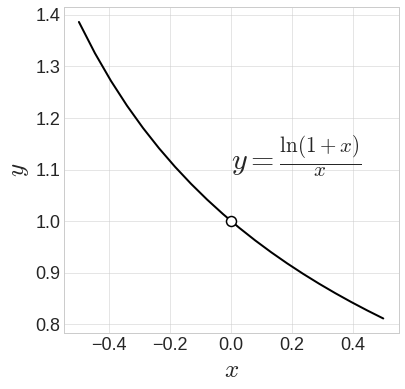

In [14]:
f = lambda x : np.log(1+x) / x
x = np.linspace(-0.5, 0.5, 20)

plt.figure(figsize=(6,6))
plt.plot(x, f(x), 'k')
plt.plot(0, 1, 'o',    markersize=10, markerfacecolor='w',
         markeredgewidth=1.5, markeredgecolor='k')
plt.text(0., 1.1, r"$y=\frac{\ln (1+x)}{x}$", fontsize=30)
plt.xlabel(r'$x$', fontsize=25)
plt.ylabel(r'$y$', fontsize=25)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.show()

$x \to 0$일 때 극한값 1을 가짐을 확인할 수 있습니다. 구체적인 계산 과정은 아래와 같습니다.

$$
\begin{aligned}
\lim_{x \to 0} \frac{\ln(1+x)}{x} 
&= \lim_{x \to 0} \frac{1}{x} \ln(1+x) \\[5pt]
&=  \lim_{x \to 0} \ln(1+x)^{\frac{1}{x} } \\[5pt]
&= \ln e = 1
\end{aligned}
$$

### 4. $\lim_{x \to 0} \dfrac{\log_a(1+x)}{x} = \dfrac{1}{\ln a}$

이 경우도 동일하게 보일 수 있습니다. 우선 그림을 그려보겠습니다.


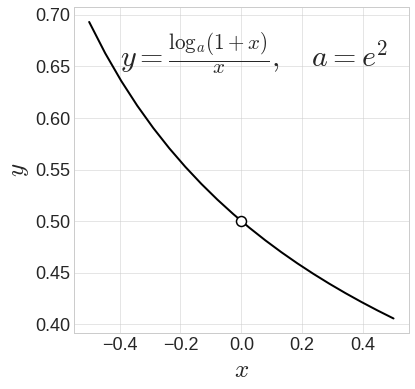

In [15]:
a = np.e**2
f = lambda x : (np.log(1+x)/np.log(a)) / x
x = np.linspace(-0.5, 0.5, 20)

plt.figure(figsize=(6,6))
plt.plot(x, f(x), 'k')
plt.plot(0, 1/np.log(a), 'o',   markersize=10, markerfacecolor='w',
         markeredgewidth=1.5, markeredgecolor='k')
plt.text(-0.4, 0.65, r"$y=\frac{\log_a (1+x)}{x},\quad a=e^2$", fontsize=30)
plt.xlabel(r'$x$', fontsize=25)
plt.ylabel(r'$y$', fontsize=25)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.show()

이번에도 $a=e^2$로 두고 그림을 그려보면 극한값이 $\dfrac{1}{2}$이라는 것을 알 수 있습니다. 주어진 함수의 극한값이 $\dfrac{1}{\ln a}$라면 이 경우 $\dfrac{1}{\ln e^2}= \dfrac{1}{2}$가 되어 그림의 결과와 일치하는 것을 알 수 있습니다. 구체적으로 계산해보면 다음과 같습니다.

$$
\begin{aligned}
\lim_{x \to 0} \frac{\log_a(1+x)}{x} 
&= \lim_{x \to 0} \frac{1}{x} \log_a(1+x) \\[5pt]
&= \lim_{x \to 0}\log_a(1+x) ^ {\frac{1}{x}} \\[5pt]
&= \log_a e = \frac{1}{\ln a}
\end{aligned}
$$

이번에도 마지막 등호에서 로그의 밑변환 성질을 이용했습니다.

위 4가지 극한은 지수, 로그 함수의 도함수 공식을 유도할 때 유용하게 사용되므로 잘 알아두면 나중에 도함수의 공식이 기억이 나지 않을 때공식을 직접 유도할 수 있기 때문에 많은 도움이 됩니다.

In [13]:
%%html
<link href='https://fonts.googleapis.com/earlyaccess/notosanskr.css' rel='stylesheet' type='text/css'>
<!--https://github.com/kattergil/NotoSerifKR-Web/stargazers-->
<link href='https://cdn.rawgit.com/kattergil/NotoSerifKR-Web/5e08423b/stylesheet/NotoSerif-Web.css' rel='stylesheet' type='text/css'>
<!--https://github.com/Joungkyun/font-d2coding-->
<link href="http://cdn.jsdelivr.net/gh/joungkyun/font-d2coding/d2coding.css" rel="stylesheet" type="text/css">
<style>
    h1 { font-family: 'Noto Sans KR' !important; color:#348ABD !important;   }
    h2 { font-family: 'Noto Sans KR' !important; color:#467821 !important;   }
    h3 { font-family: 'Noto Sans KR' !important; color:#A60628 !important;   }
    h4 { font-family: 'Noto Sans KR' !important; color:#7A68A6 !important;   }        
            
    p:not(.navbar-text) { font-family: 'Noto Serif KR', 'Nanum Myeongjo'; font-size: 11pt; line-height: 200%;  text-indent: 10px; }
    li:not(.dropdown):not(.p-TabBar-tab):not(.p-MenuBar-item):not(.jp-DirListing-item):not(.p-CommandPalette-header):not(.p-CommandPalette-item):not(.jp-RunningSessions-item):not(.p-Menu-item)   
            { font-family: 'Noto Serif KR', 'Nanum Myeongjo'; font-size: 12pt; line-height: 200%; }
    table  { font-family: 'Noto Sans KR' !important;  font-size: 11pt !important; }        
    li > p  { text-indent: 0px; }
    li > ul { margin-top: 0px !important; }       
    sup { font-family: 'Noto Sans KR'; font-size: 9pt; } 
    code, pre  { font-family: D2Coding, 'D2 coding' !important; font-size: 11pt !important; line-height: 130% !important;}
    .code-body { font-family: D2Coding, 'D2 coding' !important; font-size: 11pt !important;}
    .ns        { font-family: 'Noto Sans KR'; font-size: 15pt;}
    .summary   {
                   font-family: 'Georgia'; font-size: 12pt; line-height: 200%; 
                   border-left:3px solid #D55E00; 
                   padding-left:20px; 
                   margin-top:10px;
                   margin-left:15px;
               }
    .green { color:#467821 !important; }
    .comment { font-family: 'Noto Sans KR'; font-size: 10pt; }
</style>